# Importando a Base de Dados

In [92]:
import pandas as pd

In [93]:
dados = pd.read_csv('tips.csv')
dados.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [94]:
dados.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Renomendo Colunlas e Valores

In [95]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [96]:
renomear = {'total_bill': 'valor_da_conta',
           'tip': 'gorjeta',
           'dessert': 'sobremesa',
           'day': 'dia',
           'time': 'periodo',
           'size': 'total_de_pessoas'}

In [97]:
# Atribuindo a base de dadose em uma nova variável e renomeando as columnas definida no dict renomear
gorjetas = dados.rename(columns = renomear)

In [98]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [99]:
# Visuliszando todos os tipos na coluna 'sobremesa'
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [100]:
sim_nao = {'No': 'Não',
           'Yes': 'Sim'}

In [101]:
# mapeando valores na coluna 'sobremesa', retorna os valores definidos em 'sim_nao'
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [102]:
# Substiruindo os valores com sim e não
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [103]:
# Retorna tuplas aleatórias para verificarmos se ocorreu tudo bem com a substituição
gorjetas.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas
5,25.29,4.71,Não,Sun,Dinner,4
2,21.01,3.50,Não,Sun,Dinner,3
187,30.46,2.00,Sim,Sun,Dinner,5
177,14.48,2.00,Sim,Sun,Dinner,2
162,16.21,2.00,Não,Sun,Dinner,3
202,13.00,2.00,Sim,Thur,Lunch,2
1,10.34,1.66,Não,Sun,Dinner,3
166,20.76,2.24,Não,Sun,Dinner,2
79,17.29,2.71,Não,Thur,Lunch,2
10,10.27,1.71,Não,Sun,Dinner,2


In [104]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [105]:
dias_da_semana = {'Sun': 'Domingo',
                  'Sat': 'Sábado',
                  'Thur': 'Quinta',
                  'Fri': 'Sexta'}

In [106]:
gorjetas.dia.map(dias_da_semana)

0      Domingo
1      Domingo
2      Domingo
3      Domingo
4      Domingo
        ...   
239     Sábado
240     Sábado
241     Sábado
242     Sábado
243     Quinta
Name: dia, Length: 244, dtype: object

In [107]:
gorjetas.dia = gorjetas.dia.map(dias_da_semana)

In [108]:
gorjetas.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas
195,7.56,1.44,Não,Quinta,Lunch,2
148,9.78,1.73,Não,Quinta,Lunch,2
44,30.40,5.60,Não,Domingo,Dinner,4
16,10.33,1.67,Não,Domingo,Dinner,3
212,48.33,9.00,Não,Sábado,Dinner,4
32,15.06,3.00,Não,Sábado,Dinner,2
95,40.17,4.73,Sim,Sexta,Dinner,4
93,16.32,4.30,Sim,Sexta,Dinner,2
233,10.77,1.47,Não,Sábado,Dinner,2
243,18.78,3.00,Não,Quinta,Dinner,2


In [109]:
gorjetas.periodo.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [110]:
periodo = {'Dinner': 'Jantar',
          'Lunch': 'Almoço'}

In [111]:
gorjetas.periodo = gorjetas.periodo.map(periodo)

In [112]:
gorjetas.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas
18,16.97,3.50,Não,Domingo,Jantar,3
74,14.73,2.20,Não,Sábado,Jantar,2
126,8.52,1.48,Não,Quinta,Almoço,2
122,14.26,2.50,Não,Quinta,Almoço,2
4,24.59,3.61,Não,Domingo,Jantar,4
222,8.58,1.92,Sim,Sexta,Almoço,1
114,25.71,4.00,Não,Domingo,Jantar,3
85,34.83,5.17,Não,Quinta,Almoço,4
170,50.81,10.00,Sim,Sábado,Jantar,3
176,17.89,2.00,Sim,Domingo,Jantar,2


# Visualização de dados com seaborn

In [113]:
import seaborn as sns

In [114]:
!pip show seaborn

Name: seaborn
Version: 0.10.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\dorivan\anaconda3\lib\site-packages
Requires: numpy, scipy, pandas, matplotlib
Required-by: 


## Análise I: Valor da conta e gorjeta

In [115]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia', 'periodo',
       'total_de_pessoas'],
      dtype='object')

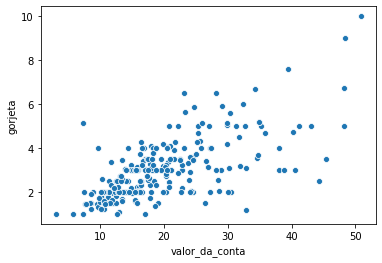

In [116]:
# Visualiza se de acordo com o aumento da conta a gorjeta também  aumenta, 3 parâmetros eixo X, Y e a base de dados
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

**Visualmente, o valor da gonjeta aumenta conforme aumenta o valor da conta, mas não proporcionalmente.**

In [117]:
# Verificando se existe valores nulos
gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia               244 non-null    object 
 4   periodo           244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


# Criando o campo porcentagem

In [118]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [119]:
gorjetas['porcentagem'] =  gorjetas['gorjeta'] / gorjetas['valor_da_conta'] * 100

In [120]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.944673
1,10.34,1.66,Não,Domingo,Jantar,3,16.054159
2,21.01,3.50,Não,Domingo,Jantar,3,16.658734
3,23.68,3.31,Não,Domingo,Jantar,2,13.978041
4,24.59,3.61,Não,Domingo,Jantar,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,20.392697
240,27.18,2.00,Sim,Sábado,Jantar,2,7.358352
241,22.67,2.00,Sim,Sábado,Jantar,2,8.822232
242,17.82,1.75,Não,Sábado,Jantar,2,9.820426


In [121]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [122]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,20.39
240,27.18,2.00,Sim,Sábado,Jantar,2,7.36
241,22.67,2.00,Sim,Sábado,Jantar,2,8.82
242,17.82,1.75,Não,Sábado,Jantar,2,9.82


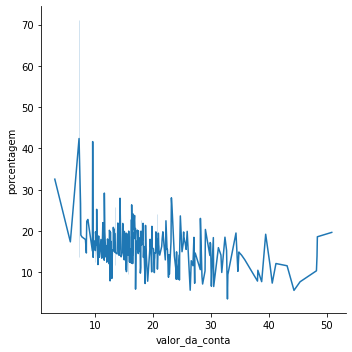

In [123]:
# Grafico de linha
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

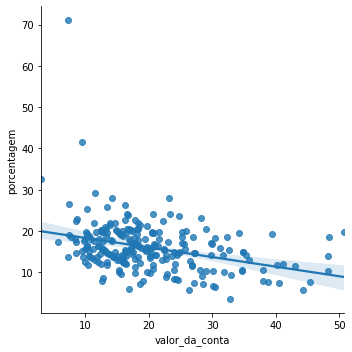

In [124]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

***Conforme o valor da conta aumenta, a porcentagem da gorjeta decresce.***

# Análise II: Sobremesa

In [125]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [126]:
# Retorna apenas as tuplas com sobremesa igual a 'Sim'
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,7.89
58,11.24,1.76,Sim,Sábado,Jantar,2,15.66
60,20.29,3.21,Sim,Sábado,Jantar,2,15.82
61,13.81,2.00,Sim,Sábado,Jantar,2,14.48
62,11.02,1.98,Sim,Sábado,Jantar,2,17.97
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,19.32
236,12.60,1.00,Sim,Sábado,Jantar,2,7.94
237,32.83,1.17,Sim,Sábado,Jantar,2,3.56
240,27.18,2.00,Sim,Sábado,Jantar,2,7.36


In [127]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


In [128]:
gorjetas[gorjetas.sobremesa == 'Não']

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68
...,...,...,...,...,...,...,...
235,10.07,1.25,Não,Sábado,Jantar,2,12.41
238,35.83,4.67,Não,Sábado,Jantar,3,13.03
239,29.03,5.92,Não,Sábado,Jantar,3,20.39
242,17.82,1.75,Não,Sábado,Jantar,2,9.82


In [129]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


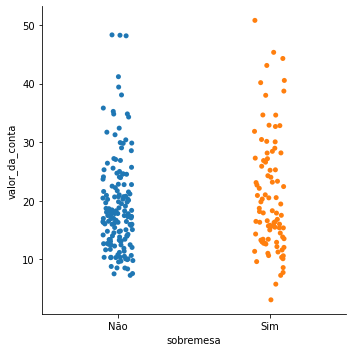

In [130]:
sns.catplot(x = 'sobremesa', y = 'valor_da_conta', data = gorjetas)

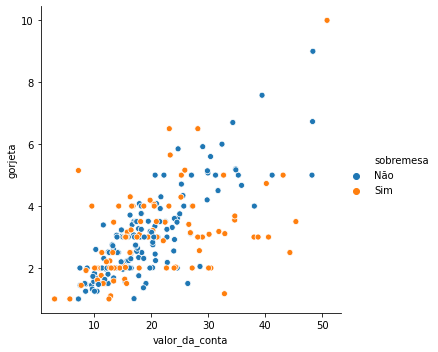

In [131]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

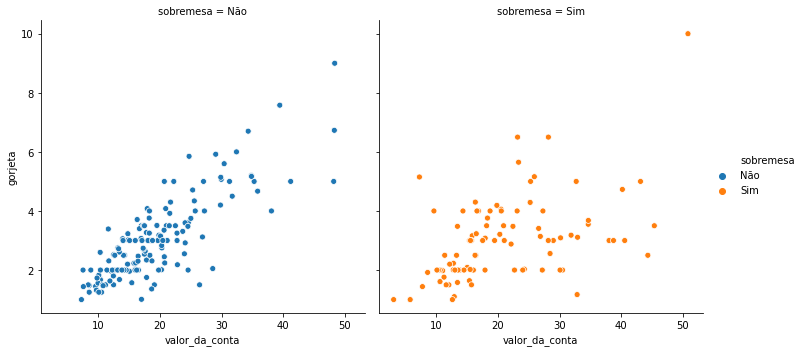

In [132]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

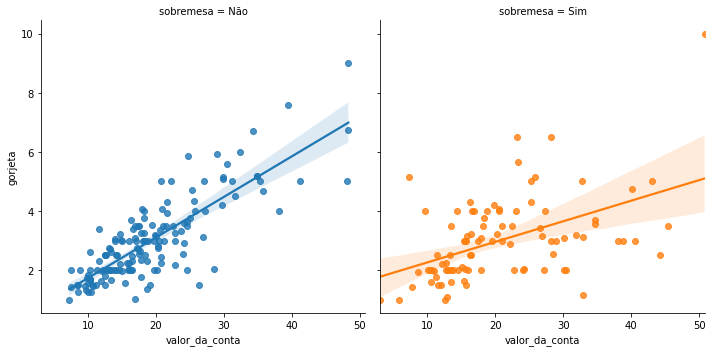

In [133]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', hue = 'sobremesa', data = gorjetas)

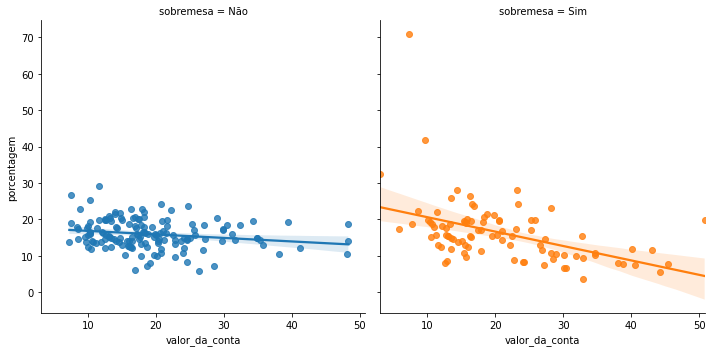

In [134]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', col = 'sobremesa', hue = 'sobremesa', data = gorjetas)

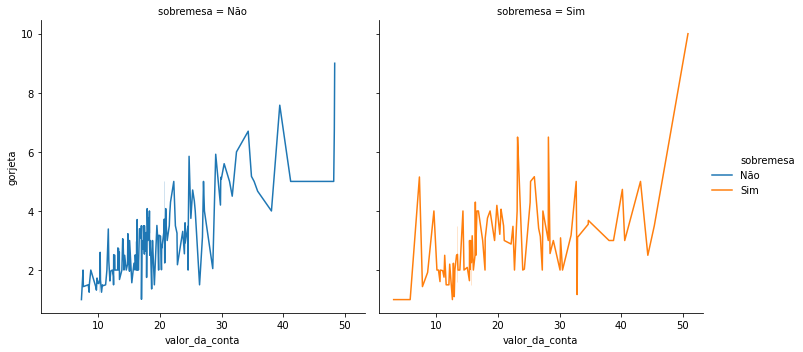

In [135]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', hue = 'sobremesa', kind = 'line', data = gorjetas)

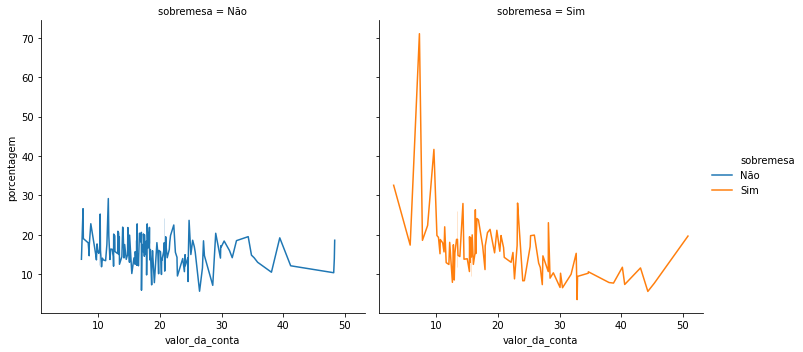

In [136]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', col = 'sobremesa', hue = 'sobremesa', kind = 'line', data = gorjetas)

**Visualmente, existe uma diferença no valor daqueles que pediram a sobremesa e que não pediram a sobremesa.**

# Teste de hipótese: Taxa de gorjetas sobre a sobremesa

## H Null
    A distribuição da taxa de gorjeta é a mesma nos dois grupos.
    
## H Alt
    A distribuição da taxa de gorjeta não é a mesma nos dois grupos.
    OBS: valido apenas para p-value menor ou igual a 0.05

In [137]:
from scipy.stats import ranksums

In [138]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [139]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [140]:
r = ranksums(sobremesa, sem_sobremesa)

In [141]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.558850059321255


### H Null
    A distribuição da taxa de gorjeta é a mesma nos dois grupos
    p-value = 0.55.

# Análise III: Dias da Semana

In [142]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94


In [143]:
gorjetas.dia.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

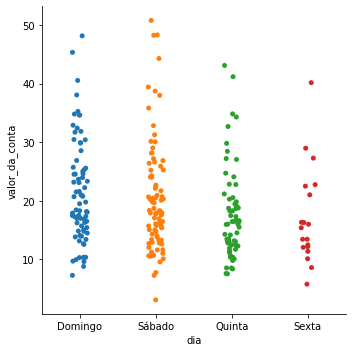

In [144]:
sns.catplot(x = 'dia', y = 'valor_da_conta', data = gorjetas)

### Visualmente, as pessoas gastam menos nas quintas e sextas
### sábado e domingo aparentam ter vendas aproximadas.

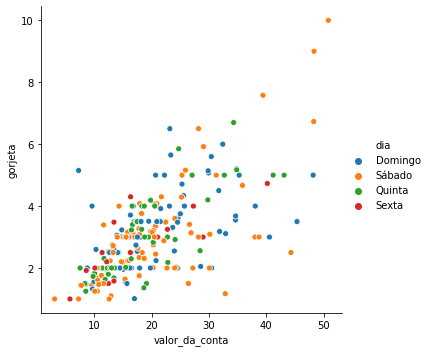

In [145]:
# Valor X gorjeta em um único grafico
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia', data = gorjetas)

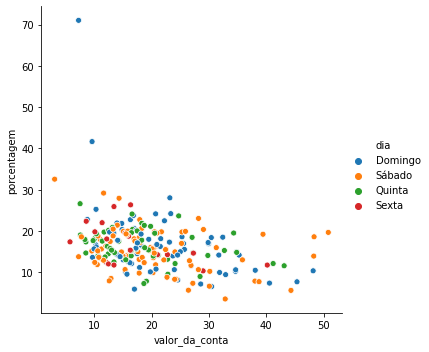

In [146]:
# Valor X porcentagem em um único grafico  
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia', data = gorjetas)

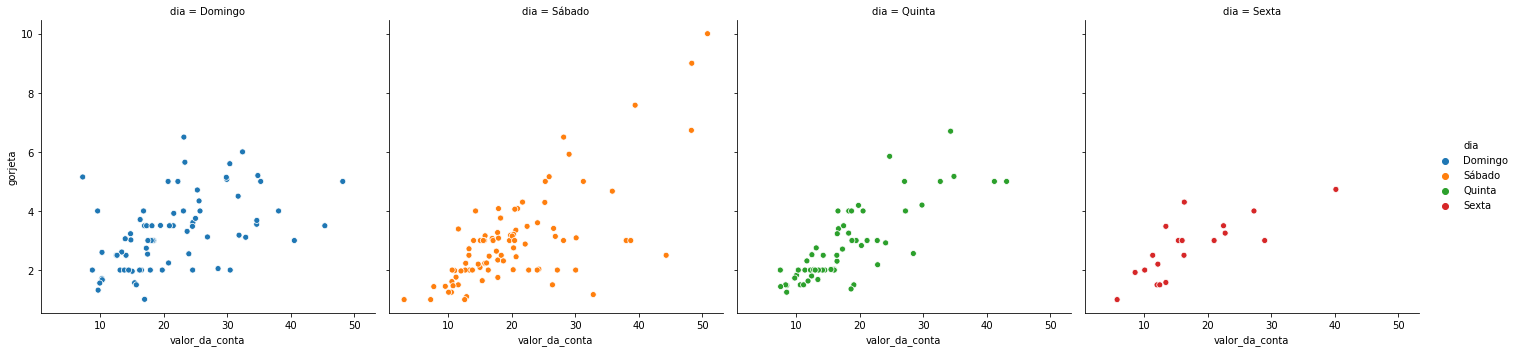

In [147]:
# valor X gorjeta para cada dia da semana
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia', col = 'dia', data = gorjetas)

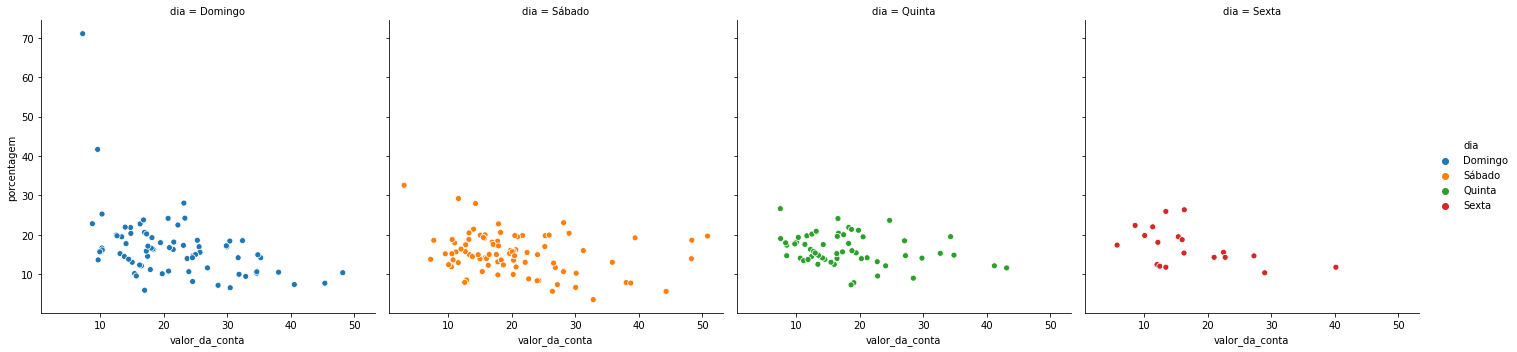

In [148]:
# Valor X porcentagem para cada dia da semana
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia', col = 'dia', data = gorjetas)

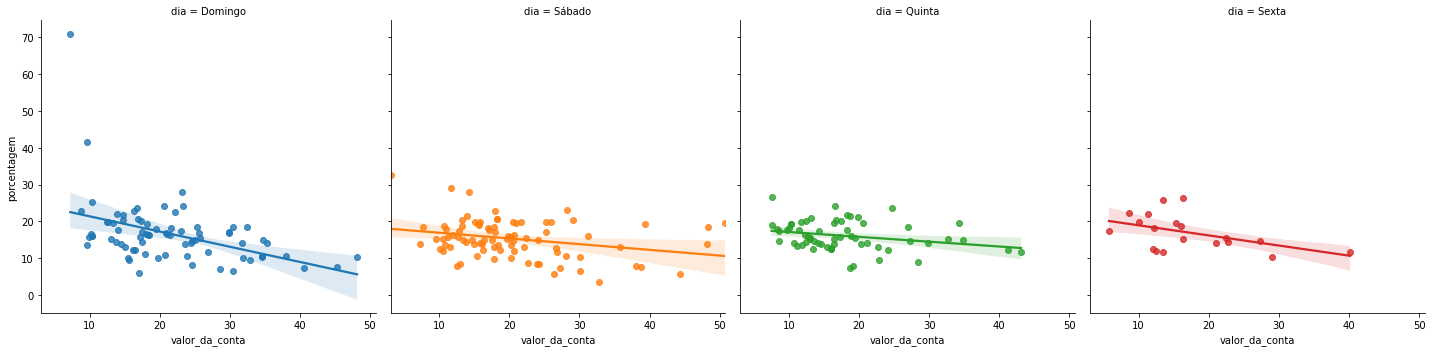

In [149]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia', col = 'dia', data = gorjetas)

## Análise descritiva

In [150]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [151]:
# Média geral de cada dia
gorjetas.groupby(['dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia,,,
Domingo,21.410000,3.255132,16.689605
Quinta,17.682742,2.771452,16.126452
Sexta,17.151579,2.734737,16.991579
Sábado,20.441379,2.993103,15.314598


In [152]:
# Contagem de vendas por dia
gorjetas.dia.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia, dtype: int64

### Temos mais frequencia nos sábados == 87, porém a maior média de gorjetas é no domingo == 3.25 

# Teste dehipótese: Sábado vs Domingo

## H Null
    A distribuição do valor da conta é igual no sábado e no domingo.
    
## H Alt
    A distribuição do valor da conta não é igual no sádado e no domingo.
    OBS: valido apenas para p-value menor ou igual a 0.05

In [153]:
valor_conta_domingo = gorjetas.query("dia == 'Domingo'").valor_da_conta

In [154]:
valor_conta_sabado = gorjetas.query("dia == 'Sábado'").valor_da_conta

In [155]:
r = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.3576728477868443


## H Null
    A distribuição do valor da conta é igual no sábado e no domingo
    p-value = 0.35.

In [156]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [157]:
gorjetas.periodo.unique()

array(['Jantar', 'Almoço'], dtype=object)

# Análise IV: Período do dia

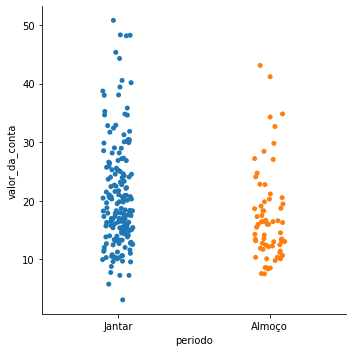

In [158]:
sns.catplot(x = 'periodo', y = 'valor_da_conta', data = gorjetas)

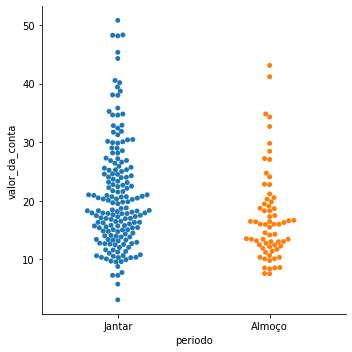

In [159]:
# Swarm separa os valores que estão um em cima do outro, deixando cada ponto visível
sns.catplot(x = 'periodo', y = 'valor_da_conta', kind = 'swarm', data = gorjetas)

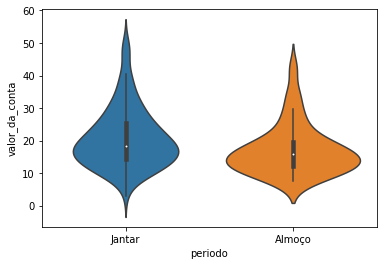

In [160]:
sns.violinplot(x = 'periodo', y = 'valor_da_conta', data = gorjetas)

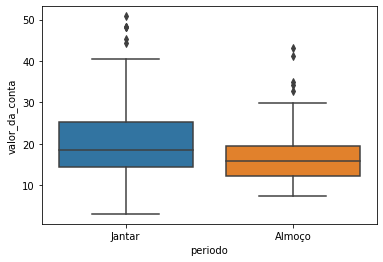

In [161]:
sns.boxplot(x = 'periodo', y = 'valor_da_conta', data  = gorjetas)

In [162]:
almoco = gorjetas.query('periodo == "Almoço"').valor_da_conta

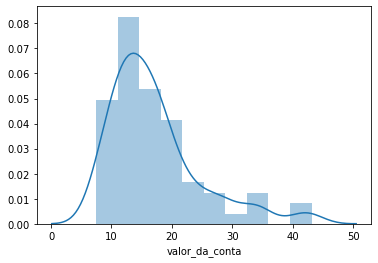

In [163]:
sns.distplot(almoco)

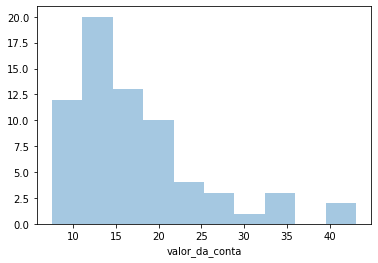

In [164]:
sns.distplot(almoco, kde = False)

In [165]:
jantar = gorjetas.query('periodo == "Jantar"').valor_da_conta

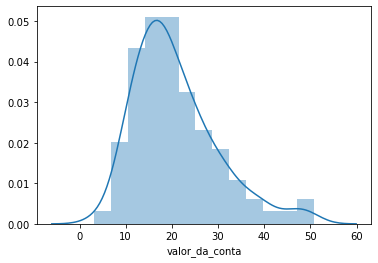

In [166]:
sns.distplot(jantar)

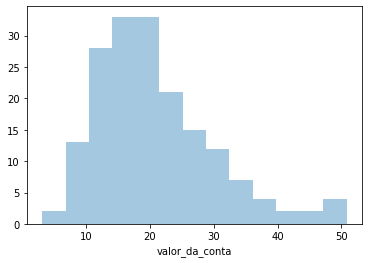

In [167]:

sns.distplot(jantar, kde = False)

In [168]:
gorjetas.groupby(['periodo']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
periodo,,,
Almoço,17.168676,2.728088,16.411765
Jantar,20.797159,3.102670,15.951477


# Teste de hipótese: Almoço vs Jantar

## H Null
    A distribuição do valor da conta é igual no almoço e no jantar.
    
## H Alt
    A distribuição do valor da conta não é igual no almoço e no jantar.
    OBS: valido apenas para p-value menor ou igual a 0.05

In [169]:
ranksums(jantar, almoço)

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

## H Alt
    A distribuição do valor da conta não é igual no almoço e no jantar
    p-value é menor do que 0.05

# Teste de hipótese: Taxa de gorjetas

## H Null
    A distribuição da taxa da gorjeta é igual no almoço e no jantar.
    
## H Alt
    A distribuição da taxa da gorjeta não é igual no almoço e no jantar.
    OBS: valido apenas para p-value menor ou igual a 0.05

In [170]:
porcentagem_almoco = gorjetas.query('periodo == "Almoço"').porcentagem

In [171]:
porcentagem_jantar = gorjetas.query('periodo == "Jantar"').porcentagem

In [172]:
ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=1.204699018193021, pvalue=0.22831951519679017)

## H Null
    A distribuição da taxa da gorjeta é igual no almoço e no jantar
    p-value == 0.22
    